In [1]:
from utils import *
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
fd_collection = getCollection("team_5_mwdb_phase_2", "fd_collection")

In [49]:
def pca_inherent_dimensionality(data, threshold):

    # Calculate the mean of the data
    mean = np.mean(data, axis=0)

    # Center the data by subtracting the mean
    centered_data = data - mean

    # Normalize the data
    normalized_data = centered_data / np.std(centered_data, axis=0, ddof=1)

    # Reshape the normalized data to get 2-mode tensor (matrix)
    reshaped_normalized_data = normalized_data.reshape(normalized_data.shape[0], -1)

    # Calculate the covariance matrix
    covariance_matrix = np.dot(reshaped_normalized_data.T, reshaped_normalized_data) / (reshaped_normalized_data.shape[0])

    # Compute the eigenvalues and eigenvectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    # Sort the eigenvalues in descending order
    # sorted_indices = np.argsort(eigenvalues)[::-1]
    # Sort the eigenvectors accordingly
    # sorted_eigenvectors = eigenvectors[:, sorted_indices]
    # print(sorted_eigenvectors)

    # Calculate the mean of each subarray- the sorted_eigenvectors are in the form of subarrays, while computing the inherent dimensionality, each value is compared with 
    #the threshold, hence mean of each subarray is computed and then it is compared with the threshold value (I am not sure if we can do this?)
    # means = np.mean(sorted_eigenvectors, axis=1)
    
    # Determine the number of top eigenvalues such that their cumulative explained variance is greater than threshold
    cumulative_explained_variance = eigenvalues.cumsum()
    inherent_dimensionality = np.searchsorted(cumulative_explained_variance, threshold*reshaped_normalized_data.shape[-1], side='right')
    #inherent_dimensionality = len(significant_eigenvalues)
    #significant_eigenvalues = means[sorted_eigenvectors > threshold]
    #significant_eigenvalues = sorted_eigenvectors[sorted_indices][eigenvalues > threshold]

    return inherent_dimensionality

In [10]:
def library_pca_inherent_dimensionality(data):
    from sklearn.decomposition import PCA

    # Calculate the mean of the data
    mean = np.mean(data, axis=0)
    # Center the data by subtracting the mean
    centered_data = data - mean
    # Normalize the data
    normalized_data = centered_data / np.std(centered_data, axis=0)
    # Reshape the centered data to ensure compatible dimensions
    reshaped_normalized_data = normalized_data.reshape(normalized_data.shape[0], -1)
    print(reshaped_normalized_data.shape)
    # Assuming X is your standardized data
    pca = PCA()
    pca.fit(reshaped_normalized_data)

    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
            np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.show()

In [40]:
# Retrieve all feature spaces from the database
cm_data = []
hog_data = []
layer3_data = []
avgpool_data = []
fc_data = []
resnet_data = []
for document in fd_collection.find():
    cm_data.append(document["cm_fd"])
    hog_data.append(document["hog_fd"])
    avgpool_data.append(document["avgpool_fd"])
    layer3_data.append(document["layer3_fd"])
    fc_data.append(document["fc_fd"])
    resnet_data.append(document["resnet_fd"])


In [41]:
cm_data = np.array(cm_data)
hog_data = np.array(hog_data)
avgpool_data = np.array(avgpool_data)
layer3_data = np.array(layer3_data)
fc_data = np.array(fc_data)
resnet_data = np.array(resnet_data)

(4339, 900)


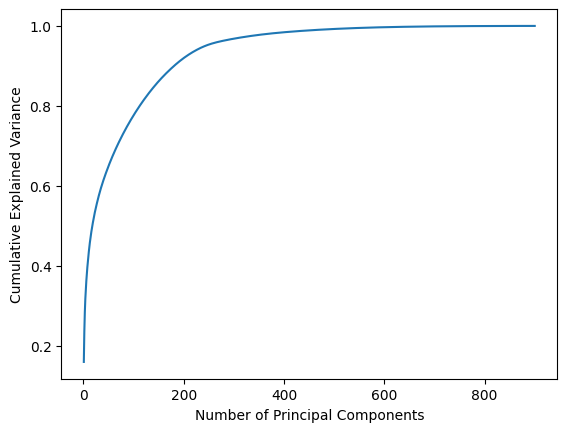

In [42]:
library_pca_inherent_dimensionality(cm_data)

In [56]:
threshold=0.95
cm_dimensionality = pca_inherent_dimensionality(cm_data, threshold)
print("Inherent dimensionality associated with the even numbered images: ", cm_dimensionality)

Inherent dimensionality associated with the even numbered images:  243


(4339, 900)


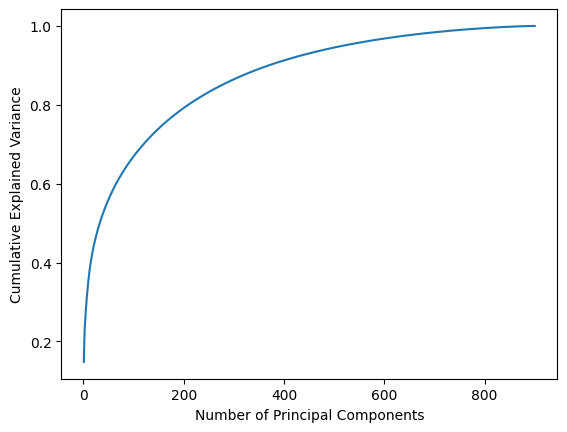

In [43]:
library_pca_inherent_dimensionality(hog_data)


In [58]:
threshold=0.95
hog_dimensionality = pca_inherent_dimensionality(hog_data, threshold)
print("Inherent dimensionality associated with the even numbered images: ", hog_dimensionality)

Inherent dimensionality associated with the even numbered images:  556


(4339, 1024)


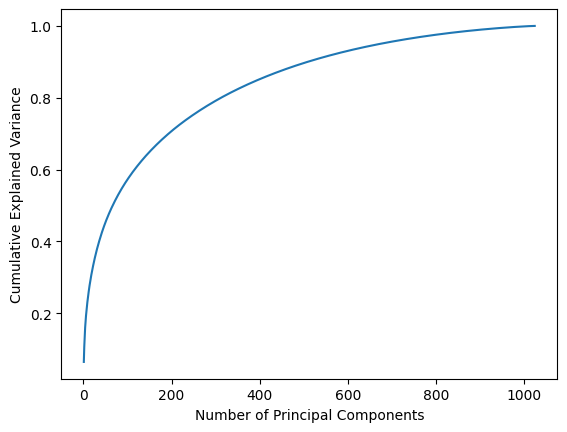

In [44]:
library_pca_inherent_dimensionality(avgpool_data)


In [59]:
threshold=0.95
avgpool_dimensionality = pca_inherent_dimensionality(avgpool_data, threshold)
print("Inherent dimensionality associated with the even numbered images: ", avgpool_dimensionality)

Inherent dimensionality associated with the even numbered images:  744


(4339, 1024)


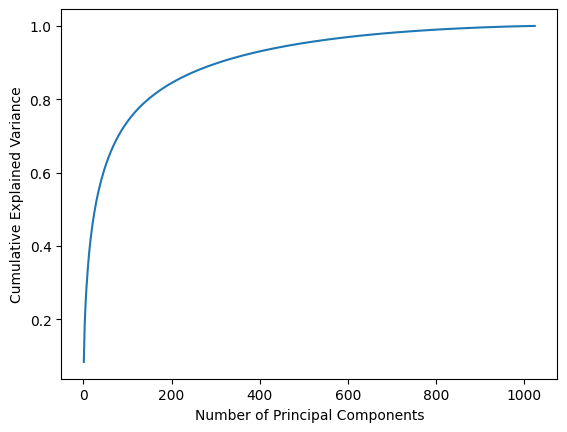

In [45]:
library_pca_inherent_dimensionality(layer3_data)


In [60]:
threshold=0.95
layer3_dimensionality = pca_inherent_dimensionality(layer3_data, threshold)
print("Inherent dimensionality associated with the even numbered images: ", layer3_dimensionality)

Inherent dimensionality associated with the even numbered images:  484


(4339, 1000)


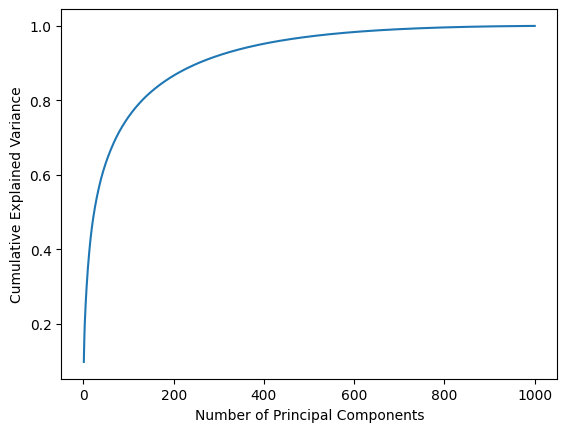

In [46]:
library_pca_inherent_dimensionality(fc_data)


In [61]:
threshold=0.95
fc_dimensionality = pca_inherent_dimensionality(fc_data, threshold)
print("Inherent dimensionality associated with the even numbered images: ", fc_dimensionality)

Inherent dimensionality associated with the even numbered images:  393


(4339, 1000)


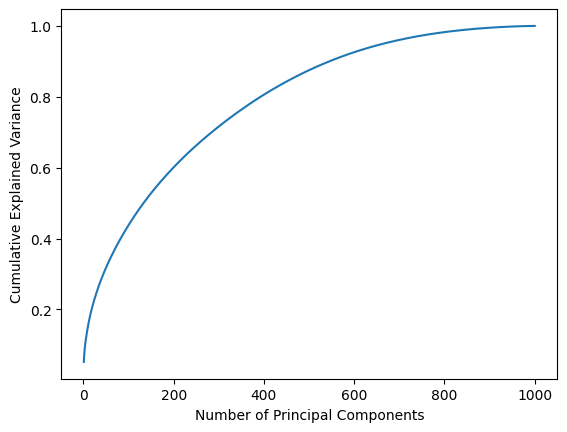

In [47]:
library_pca_inherent_dimensionality(resnet_data)


In [62]:
threshold=0.95
resnet_dimensionality = pca_inherent_dimensionality(resnet_data, threshold)
print("Inherent dimensionality associated with the even numbered images: ", resnet_dimensionality)

Inherent dimensionality associated with the even numbered images:  737
